##Task 1 : Prediction using Supervised Machine Learning
###GRIP @ The Sparks Foundation
In this regression task I tried to predict the percentage of marks that a student is expected to get based upon the number of hours they studied using simple linear regression.

##Importing Libraries

In [1]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

##Importing the data

In [3]:
# Reading data from the source
url = "http://bit.ly/w-data"
df1 = pd.read_csv(url)
df1.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##Data Visualization

To analyze the relationship between data.

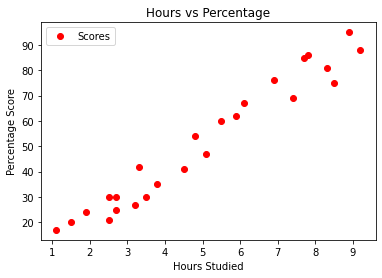

In [4]:
# Plotting the distribution of scores
df1.plot(x='Hours', y='Scores', style='o',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can see that there is a positive linear relation between the number of hours studied and percentage score.

##Data Preprocessing

In [5]:
X = df1.iloc[:, :-1].values  
y = df1.iloc[:, 1].values  

##Train test splitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Model Training

Creating the linear regression object

In [7]:
model = LinearRegression()  
model.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

## Plotting the Line of regression

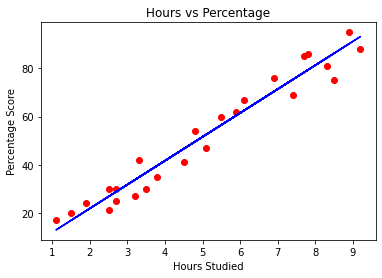

In [10]:
%matplotlib inline
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='blue');
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

##Making predictions

In [12]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##Comparison of test data with the predicted data

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Estimating training and test score
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


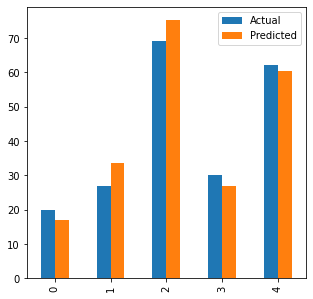

In [18]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.plot(which='major', linewidth='0.5', color='red')
plt.plot(which='minor', linewidth='0.5', color='blue')
plt.show()

In [22]:
# Testing the model with our own data
print("Predicted Score = {}".format(model.predict([[9.25]])))

Predicted Score = [93.69173249]


###How did we get the predicted score as 93.69173249% for a student who studied for 9.25 hrs/day?
According to Linear regression,
Y = mX + c

where,
X -> Independent variable 
Y -> Dependent variable
m -> Coefficient of the independent variable
c -> Intercept

In [23]:
model.coef_

array([9.91065648])

In [25]:
model.intercept_

2.018160041434662

In [26]:
# Y = 9.91065648*9.25 + 2.018160041434662
# The result of this calculation indicates on how I arrived at 93.69173249% for a student who studied for 9.25 hrs/day

9.91065648*9.25 + 2.018160041434662

93.69173248143466

##Model Evaluation

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


R-2 gives the score of model fit and in this case we have R-2=0.9454906892105354  which is actually a great score for this model.